In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf

# How can we apply linear regression to finance?

In [2]:
df = yf.download(tickers="BAC", start="2012-01-01", end="2015-01-01")

[*********************100%%**********************]  1 of 1 completed


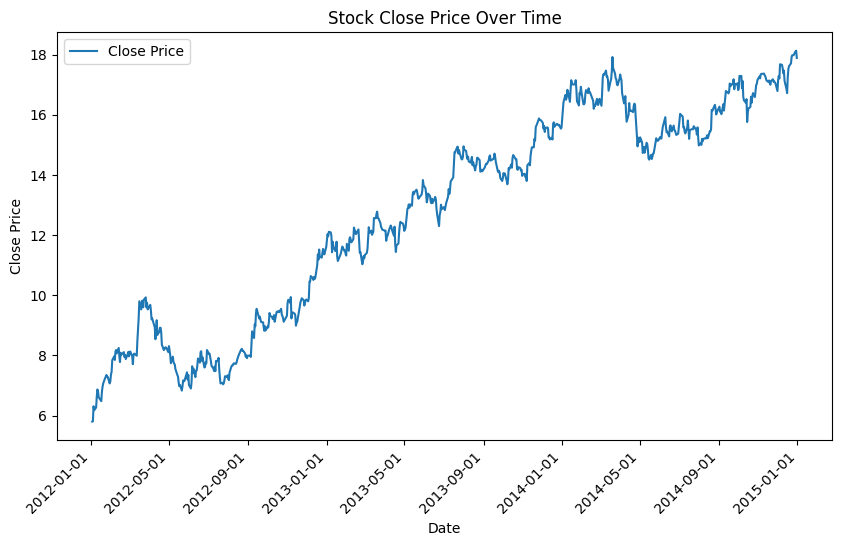

In [3]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Close"], label="Close Price")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Use any date format you prefer
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Adjusts dates automatically based on the data
plt.gcf().autofmt_xdate(rotation=45)

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Close Price Over Time")
plt.legend()
plt.show()

## Perhaps a first thought is to predict the next day price of a stock

Notice how it won't be helpful to fit the regression line on all of the data right now, so perhaps we should cut up a portion of it

In [4]:
close_price = df.loc[:, "Close"]
close_price[0:10]

Date
2012-01-03    5.80
2012-01-04    5.81
2012-01-05    6.31
2012-01-06    6.18
2012-01-09    6.27
2012-01-10    6.63
2012-01-11    6.87
2012-01-12    6.79
2012-01-13    6.61
2012-01-17    6.48
Name: Close, dtype: float64

# TAMID ASSIGNMENT:

### Pick any year window of your choice- we will be "predicting" Bank of America!

Run a "rolling" regression using the last 10 days of data. For each regression:
* predict the next day price and the price in the next 5 days.
* store your predictions for your one day predictions and 5 day predictions seperately
* Find a way to determine how "correct" your predictions were (BE CREATIVE)
* plot the difference between the true price and your predicted prices and guess the distribution
* Run the same process over but use ridge and lasso regression
* As a bonus, expand your window size and see what happens...

## Implimentation

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,5.75,5.89,5.74,5.80,4.664263,246293200
2012-01-04,5.71,5.88,5.62,5.81,4.672304,243711200
2012-01-05,5.75,6.35,5.71,6.31,5.074398,547780000
2012-01-06,6.21,6.30,6.06,6.18,4.969853,299630600
2012-01-09,6.26,6.37,6.19,6.27,5.042229,240614400


### Need to create a time index

In [19]:
df.loc[:, "Trading Time"] = (df.index - df.index[0]).days 
df.loc[:, "Row Index"] = [i for i in range(len(df.index))]

In [20]:
df

,Open,High,Low,Close,Adj Close,Volume,Trading Time,Row Index
Date,,,,,,,,
2012-01-03,5.750000,5.890000,5.740000,5.800000,4.664263,246293200,0,0
2012-01-04,5.710000,5.880000,5.620000,5.810000,4.672304,243711200,1,1
2012-01-05,5.750000,6.350000,5.710000,6.310000,5.074398,547780000,2,2
2012-01-06,6.210000,6.300000,6.060000,6.180000,4.969853,299630600,3,3
2012-01-09,6.260000,6.370000,6.190000,6.270000,5.042229,240614400,6,4
...,...,...,...,...,...,...,...,...
2014-12-24,17.969999,18.100000,17.920000,17.980000,14.678761,35091300,1086,749
2014-12-26,18.020000,18.049999,17.950001,17.980000,14.678761,34362500,1088,750
2014-12-29,17.969999,18.190001,17.910000,18.110001,14.784890,58370900,1091,751


In [21]:
tslr_data = df.loc[:, ["Adj Close", "Trading Time"]]

In [22]:
tslr_data

,Adj Close,Trading Time
Date,,
2012-01-03,4.664263,0
2012-01-04,4.672304,1
2012-01-05,5.074398,2
2012-01-06,4.969853,3
2012-01-09,5.042229,6
...,...,...
2014-12-24,14.678761,1086
2014-12-26,14.678761,1088
2014-12-29,14.784890,1091


In [23]:
X = tslr_data["Trading Time"]
y = tslr_data["Adj Close"]

In [25]:
type(X), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
LR = LinearRegression(fit_intercept=True)

### Notice how the next line will error

In [30]:
LR.fit(X,y)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

### Needs a 2-dimensional contrainer, not a Pandas series!

In [31]:
X = tslr_data["Trading Time"].values
y = tslr_data["Adj Close"].values

In [33]:
X.shape, y.shape

((754,), (754,))

### Need to adjust shapes!

In [37]:
X = tslr_data["Trading Time"].values.reshape(-1,1)
y = tslr_data["Adj Close"].values.reshape(-1,1)

In [39]:
X.shape, y.shape

((754, 1), (754, 1))

In [41]:
X[0:10], y[0:10]

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [14]]),
 array([[4.66426325],
        [4.67230415],
        [5.07439756],
        [4.9698534 ],
        [5.04222918],
        [5.33173466],
        [5.52473927],
        [5.4604063 ],
        [5.31565046],
        [5.21110916]]))

In [42]:
LR.fit(X[0:10], y[0:10])

LinearRegression()

In [48]:
LR.coef_, LR.intercept_

(array([[0.05088698]]), array([4.82134686]))

### So we just fit the first 10 days. What does this line looks like?

In [52]:
line = lambda x: LR.coef_*x + LR.intercept_

In [68]:
y_pred = line(df["Trading Time"][0:10].values).reshape(-1)

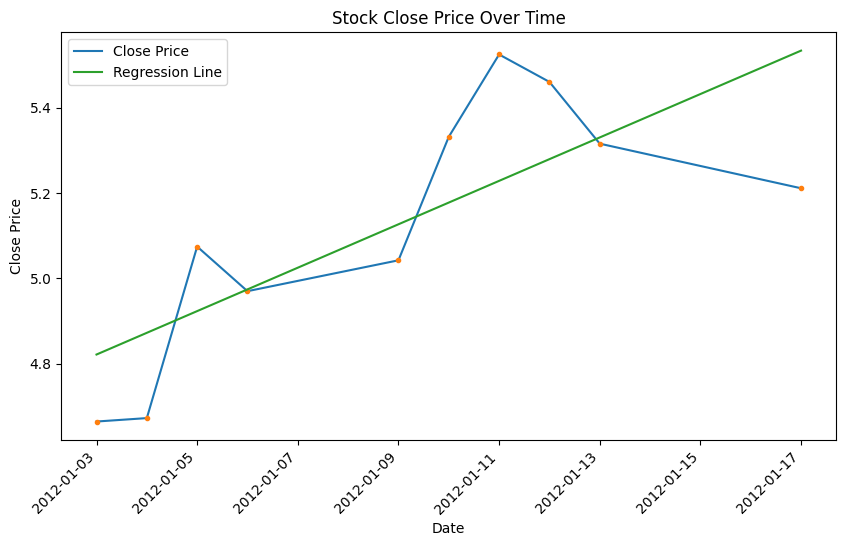

In [77]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))
plt.plot(df.index[0:10], df["Adj Close"][0:10], label="Close Price") # First ten days of close data
plt.plot(df.index[0:10], df["Adj Close"][0:10], '.') # First ten days of close data
plt.plot(df.index[0:10], y_pred, label="Regression Line")


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Use any date format you prefer
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Adjusts dates automatically based on the data
plt.gcf().autofmt_xdate(rotation=45)

plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Close Price Over Time")
plt.legend()
plt.show()

In [139]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Trading Time,Row Index
Date,,,,,,,,
2012-01-03,5.75,5.89,5.74,5.80,4.664263,246293200,0,0
2012-01-04,5.71,5.88,5.62,5.81,4.672304,243711200,1,1
2012-01-05,5.75,6.35,5.71,6.31,5.074398,547780000,2,2
2012-01-06,6.21,6.30,6.06,6.18,4.969853,299630600,3,3
2012-01-09,6.26,6.37,6.19,6.27,5.042229,240614400,6,4


In [157]:
df.loc[:, "Should Buy"] = ((df["Adj Close"].shift(-1) - df["Adj Close"]) > 0).astype(int)
df.loc[df.index[-1], "Should Buy"] = np.nan

In [160]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Trading Time,Row Index,Should Buy
Date,,,,,,,,,
2012-01-03,5.75,5.89,5.74,5.80,4.664263,246293200,0,0,1
2012-01-04,5.71,5.88,5.62,5.81,4.672304,243711200,1,1,1
2012-01-05,5.75,6.35,5.71,6.31,5.074398,547780000,2,2,0
2012-01-06,6.21,6.30,6.06,6.18,4.969853,299630600,3,3,1
2012-01-09,6.26,6.37,6.19,6.27,5.042229,240614400,6,4,1


### More regression!

Let's make more of these lines!

In [253]:
b0 = []
b1 = []
score = []
WINDOW = 10

In [254]:
for period in df.rolling(window=WINDOW):
    X = (period["Trading Time"] - period["Trading Time"].iloc[0]).values.reshape(-1,1)
    y = period["Adj Close"].values.reshape(-1,1)
    LR = LinearRegression(fit_intercept=True)
    if X.shape[0] >= 10:

        LR.fit(X, y)
        Rsq = LR.score(X, y)
        b0.append(LR.intercept_[0])
        b1.append(LR.coef_[0][0])
        score.append(Rsq)
    
    else:

        b0.append(np.nan)
        b1.append(np.nan)
        score.append(np.nan)


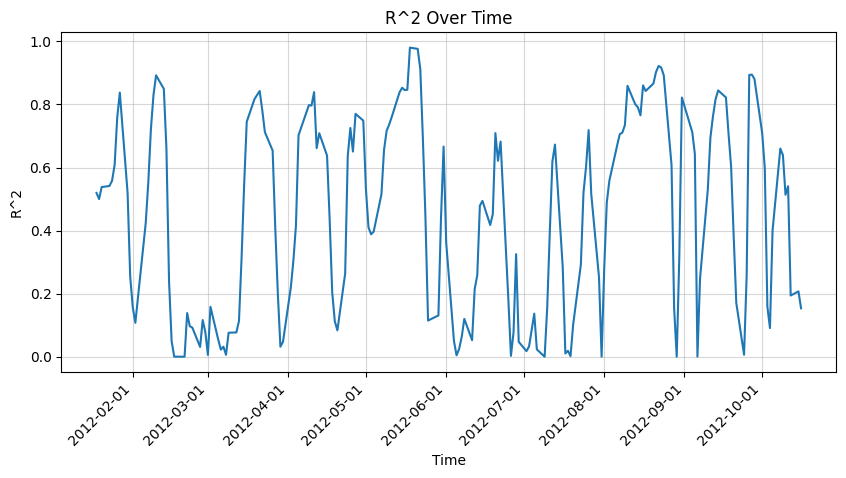

In [263]:
plt.figure(figsize=(10,5))
plt.plot(df.index[10:200], score[10:200])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  
plt.gcf().autofmt_xdate(rotation=45)
plt.xlabel("Time")
plt.ylabel("R^2")
plt.grid(alpha=0.5)
plt.title("R^2 Over Time");

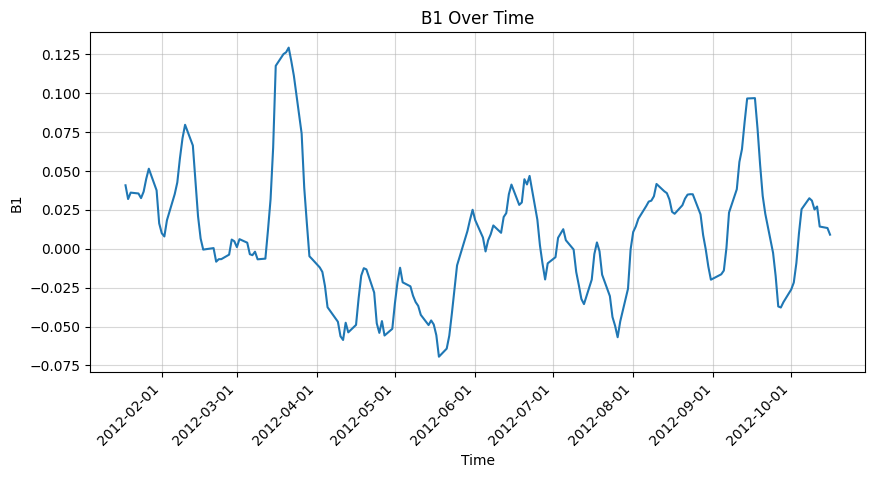

In [264]:
plt.figure(figsize=(10,5))
plt.plot(df.index[10:200], b1[10:200])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  
plt.gcf().autofmt_xdate(rotation=45)
plt.xlabel("Time")
plt.ylabel("B1")
plt.grid(alpha=0.5)
plt.title("B1 Over Time");

In [269]:
slope_coef = np.array(b1)
buy_signal = slope_coef > 0

In [272]:
buy_signal.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [281]:
df.loc[:, "Buy Signal"] = buy_signal.astype(int)
df.loc[df.index[0]:df.index[10], "Buy Signal"] = np.nan

In [288]:
((df["Should Buy"] - df["Buy Signal"]) == 0).mean()

0.46419098143236076

## With this strategy, we make the right call 46% of the time 

### Do we make or lose money?

In [296]:
df["Intra Day Gains"] = df["Adj Close"] - df["Adj Close"].shift(1)

In [297]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Trading Time,Row Index,Should Buy,Buy Signal,Intra Day Gains
Date,,,,,,,,,,,
2012-01-03,5.75,5.89,5.74,5.80,4.664263,246293200,0,0,1,NaN,NaN
2012-01-04,5.71,5.88,5.62,5.81,4.672304,243711200,1,1,1,NaN,0.008041
2012-01-05,5.75,6.35,5.71,6.31,5.074398,547780000,2,2,0,NaN,0.402093
2012-01-06,6.21,6.30,6.06,6.18,4.969853,299630600,3,3,1,NaN,-0.104544
2012-01-09,6.26,6.37,6.19,6.27,5.042229,240614400,6,4,1,NaN,0.072376


In [299]:
df.loc[df["Buy Signal"] == 1, "Intra Day Gains"].sum()

11.888668060302734

We made money!